In [343]:
import numpy as np
import pandas as pd
import seaborn as sns
import graphviz
import matplotlib.pyplot as plt
import sklearn
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn import metrics
from sklearn.metrics import classification_report

In [344]:
Url='https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'
titanic = pd.read_csv(Url)

In [345]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Insights

In [346]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [347]:
titanic.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [366]:
(titanic.isnull().sum()/titanic.shape[0])*100


Survived    0.0
Pclass      0.0
Age         0.0
SibSp       0.0
Parch       0.0
Fare        0.0
male        0.0
Q           0.0
S           0.0
dtype: float64

Sampling:
    
    Not requird as O/P catogeries are not too biased.

In [349]:
(titanic.Survived.value_counts()/titanic.shape[0])*100


0    61.616162
1    38.383838
Name: Survived, dtype: float64

#####        Feature engeneering

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CAEFA0EF48>,
      dtype=object)

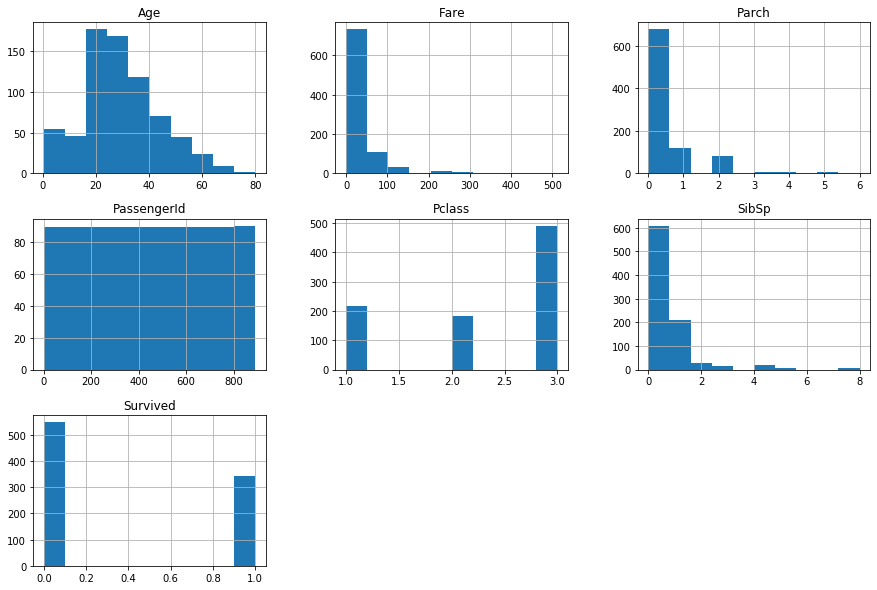

In [350]:
titanic.hist(figsize=(15,10))

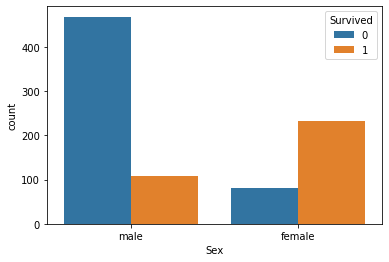

In [351]:
sns.countplot(titanic.Sex, hue=titanic.Survived)


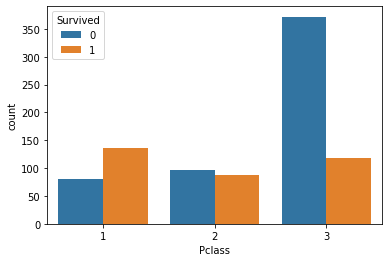

In [352]:
sns.countplot(titanic.Pclass, hue=titanic.Survived)

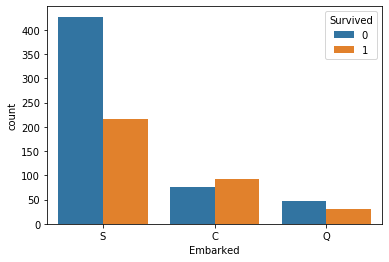

In [353]:
sns.countplot(titanic.Embarked, hue=titanic.Survived)

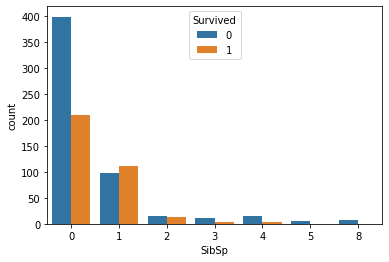

In [354]:
sns.countplot(titanic.SibSp, hue=titanic.Survived)

In [355]:
# 'PassengerId','Name','Ticket' are not required and changing Sex, Embarked to non objects



In [356]:
a= pd.get_dummies(titanic.Sex, drop_first=True )
b=pd.get_dummies(titanic.Embarked, drop_first= True)


In [357]:
titanic=pd.concat([titanic, a, b], axis=1 )

In [358]:
titanic.drop(['PassengerId','Name','Ticket', 'Sex', 'Embarked'], axis=1, inplace= True)

In [365]:
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [360]:
titanic1= titanic[['Pclass', 'Age', 'Cabin']]
print(titanic1.Pclass.value_counts())
print(((titanic1[titanic1['Pclass'] == 1].isnull().sum())/ titanic1[titanic1['Pclass'] == 1].shape[0]) *100)
print(((titanic1[titanic1['Pclass'] == 2].isnull().sum())/ titanic1[titanic1['Pclass'] == 2].shape[0]) *100)
print(((titanic1[titanic1['Pclass'] == 3].isnull().sum())/ titanic1[titanic1['Pclass'] == 3].shape[0]) *100)


3    491
1    216
2    184
Name: Pclass, dtype: int64
Pclass     0.000000
Age       13.888889
Cabin     18.518519
dtype: float64
Pclass     0.000000
Age        5.978261
Cabin     91.304348
dtype: float64
Pclass     0.000000
Age       27.698574
Cabin     97.556008
dtype: float64


In [361]:
rand=  titanic['Age'].dropna().sample(titanic['Age'].isnull().sum(), random_state=1)

In [362]:
rand.index= titanic[titanic['Age'].isnull()].index

In [363]:
titanic.loc[titanic['Age'].isnull(), 'Age']=rand

In [364]:
titanic.Cabin= titanic.Cabin.astype(str).str[0]


In [305]:
data = {'T' : 1, 'G' : 2 , 'F' : 3, 'A': 4, 'E':5,'D':6,'B':7,'C':8, 'n':10}
titanic['Cabin']= titanic['Cabin'].map(data)

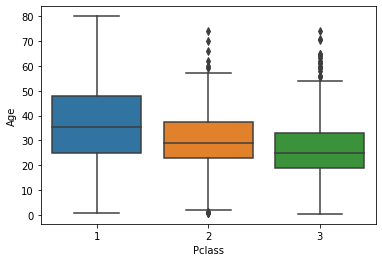

In [306]:
sns.boxplot(y=titanic.Age, x= titanic.Pclass)

In [367]:
x= titanic.drop('Survived', axis=1)
y= titanic.Survived

In [368]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier()

In [369]:
print(model.feature_importances_)

[0.10882683 0.2504634  0.04544877 0.0453745  0.24005839 0.2813289
 0.00926139 0.01923781]


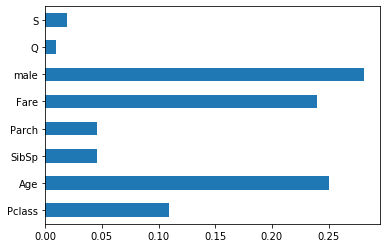

In [370]:
ranked_features=pd.Series(model.feature_importances_,index=x.columns)
ranked_features.plot(kind='barh')
plt.show()

Model selection

In [371]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state= 355)

In [372]:
#let's first visualize the tree on the data without doing any pre processing
DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)

DecisionTreeClassifier()

In [323]:
feature_name=list(x.columns)
feature_name

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'male', 'Q', 'S']

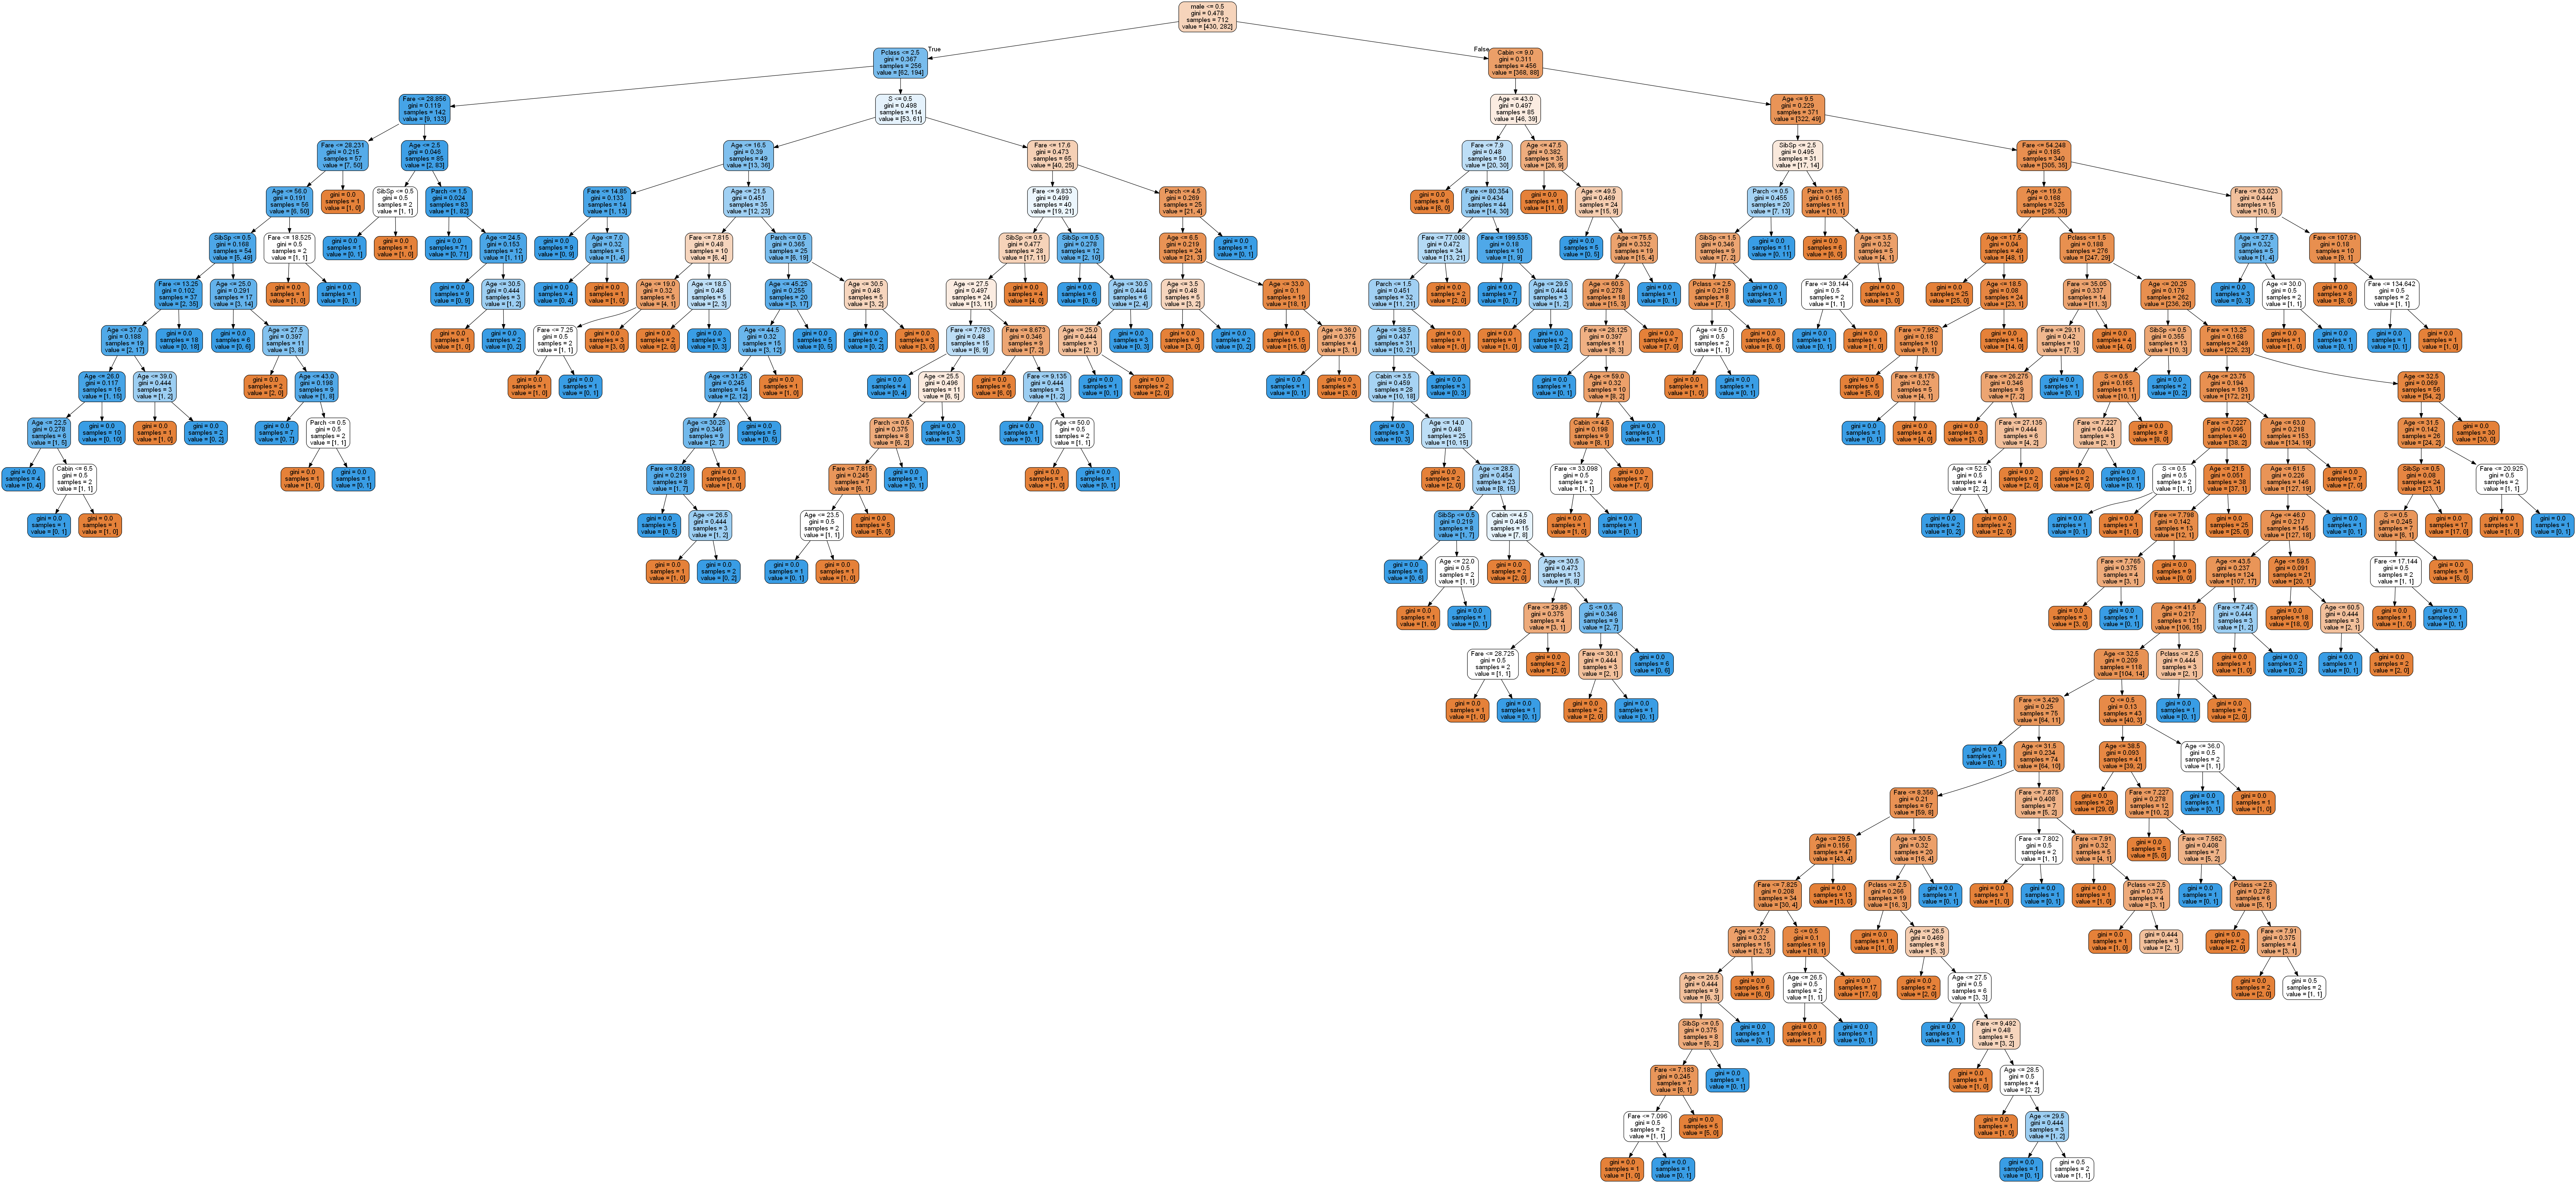

In [327]:
import pydotplus
from IPython.display import Image  
from sklearn.tree import export_graphviz
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

# create a dot_file which stores the tree structure
dot_data = export_graphviz(DT,feature_names = feature_name,rounded = True,filled = True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_png("myTree.png")
# Show graph
Image(graph.create_png())

In [373]:
DT.score(x_train,y_train)

0.9915730337078652

In [374]:
DT.score(x_test,y_test)

0.6927374301675978

hyper parameter tuning

In [375]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [376]:
grid_search = GridSearchCV(estimator=DT,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [377]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [378]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 19,
 'min_samples_leaf': 5,
 'min_samples_split': 8,
 'splitter': 'random'}

In [379]:
DT = DecisionTreeClassifier(criterion= 'gini',max_depth= 19, min_samples_leaf= 5, min_samples_split= 8, splitter= 'random')
DT.fit(x_train,y_train)
DT.score(x_train,y_train)

0.8469101123595506

In [380]:
DT.score(x_test,y_test)

0.7541899441340782

In [383]:
predicted = DT.predict(x_test)

In [384]:
conf_mat= metrics.confusion_matrix(y_test, predicted)
print(conf_mat)
print(metrics.classification_report(y_test, predicted))

[[98 21]
 [23 37]]
              precision    recall  f1-score   support

           0       0.81      0.82      0.82       119
           1       0.64      0.62      0.63        60

    accuracy                           0.75       179
   macro avg       0.72      0.72      0.72       179
weighted avg       0.75      0.75      0.75       179

